In [1]:
import os
import pathlib

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = pathlib.Path('./data/train')
filepaths = list(path.glob(r'**/*.jpg'))

def get_age_from_path(path_url): 
    parent_folder = os.path.split(path_url)[0] 
    age = parent_folder.split("\\")[-1] 
    return age

targets = list(map(lambda x: get_age_from_path(x),filepaths)) 
targets[:5]

['19', '19', '19', '19', '19']

In [6]:
column_path = pd.Series(filepaths, name='file_path').astype(str)
column_age = pd.Series(targets, name='age').astype(str)

train = pd.merge(column_path, column_age, right_index = True, left_index = True)
train = train.sample(frac = 1).reset_index(drop=True) # all shuffle 
train.head()

,file_path,age
0,data\train\48\246.jpg,48
1,data\train\23\642.jpg,23
2,data\train\27\840.jpg,27
3,data\train\33\496.jpg,33
4,data\train\45\935.jpg,45


### Plot faces

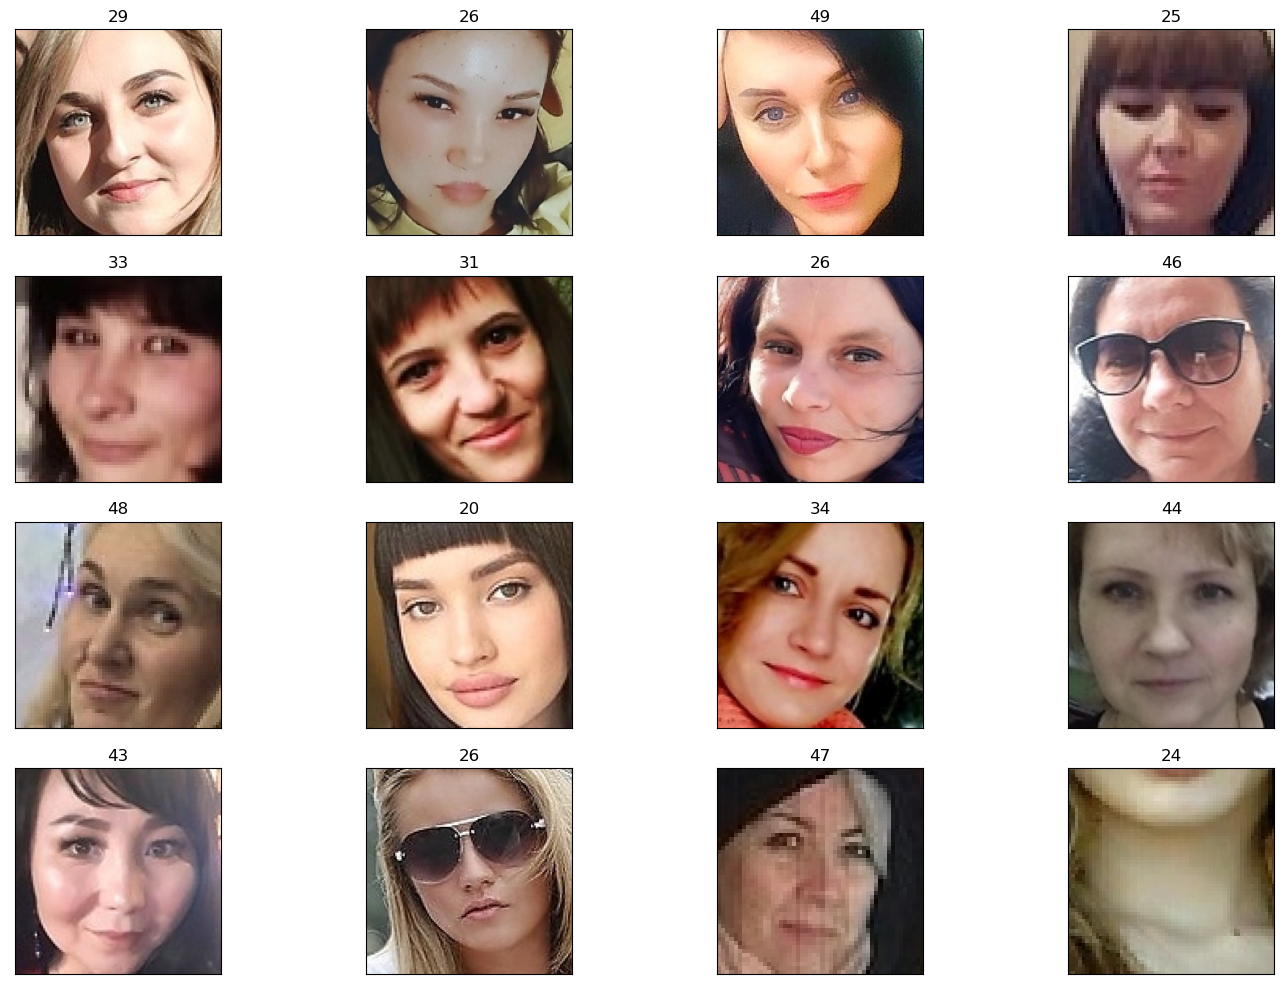

In [7]:
figures, axes = plt.subplots(nrows=4, ncols=4,figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    i = i + 18
    ax.imshow(plt.imread(train.file_path[i]))
    ax.set_title(train.age[i])
    
plt.tight_layout()
plt.show()